# Credit Card Fraud Detection
Author: Brenda De Leon
## Business Problem
##### Defining Credit Card Fraud

## Data
##### Data Limitations
2013, 
### Libraries

In [1]:
# importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
plt.style.use('ggplot')

In [7]:
# importing dataset
df = pd.read_csv('data/creditcard.csv')
df.head().append(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<b>Notes:</b> There are 284,807 rows and 31 columns. The dataset is made up of only numerical features. There are no null values to deal with. 'Amount', 'Class', and 'Time' seem straight forward. However, there are 28 columns (V1 - V28) without context, data is not available as it is likely sensitive information. We will not use these columns / further investigate what information these columns represent. 

### Correlation
Checking for multicolinearity amongst the features in the data. 

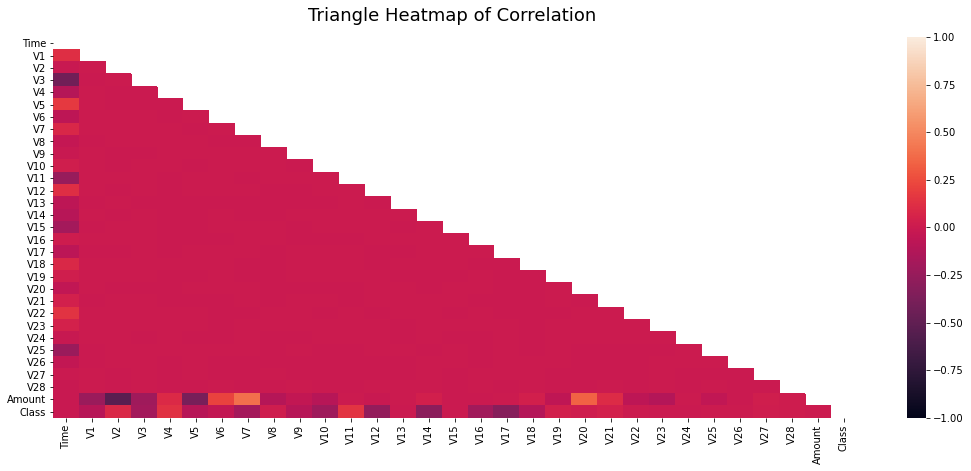

In [108]:
# setting figure size
plt.figure(figsize=(18,7))
# creating heatmap 
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, linecolor='black')
heatmap.set_title('Triangle Heatmap of Correlation ', fontdict={'fontsize':18}, pad=16);

With no significantly lighter box in the correalation heatmap, we are interpreting that there is no multicolinearity or strong correalation amongst the features in the data. 

### Target

In [12]:
# checking proportions of target
df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [9]:
# there is high imbalance in our target. 
print("Fraudulent Cases: " + str(len(df[df['Class'] == 1])))
print("Valid Transactions: " + str(len(df[df['Class'] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(df[df['Class'] == 1])/ df.shape[0]))

Fraudulent Cases: 492
Valid Transactions: 284315
Proportion of Fraudulent Cases: 0.001727485630620034


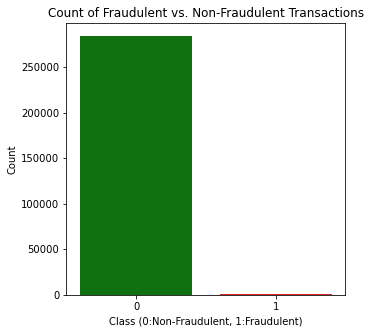

In [72]:
# fraud vs. normal transactions 
counts = df.Class.value_counts()
# use green for bar with max value and red for minority
color = ['red' if (x < max(counts)) else 'green' for x in counts]
# setting figure size
plt.figure(figsize=(5,5))
# create barplot using specified colors
sns.barplot(x=counts.index, y=counts, palette=color)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)');

We are dealing with a target that is heavily imbalanced with only 0.0017% of the transactions designated as fraud.

### Time
Defined as: 
"Number of seconds elapsed between this transaction and the first transaction in the dataset"

The values are in seconds, the higher the second amount, the further away the transaction took place from the first transaction.

In [18]:
df.Time.value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64

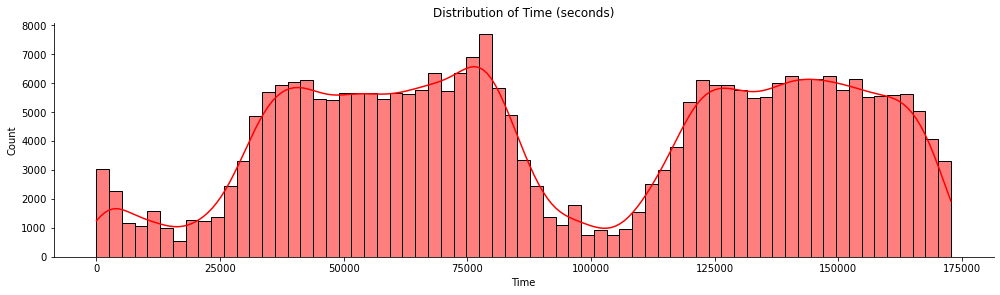

In [77]:
# visually inspecting time
sns.displot(df.Time, 
            height=4, 
            aspect=3.5, 
            kde=True,  
            color='red').set(title='Distribution of Time (seconds)');

In [33]:
# proportion summaries of select columns we will work with
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


### Amount

Defined as: "Transaction amount"

In [19]:
df.Amount.value_counts()

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
192.63         1
218.84         1
195.52         1
793.50         1
1080.06        1
Name: Amount, Length: 32767, dtype: int64

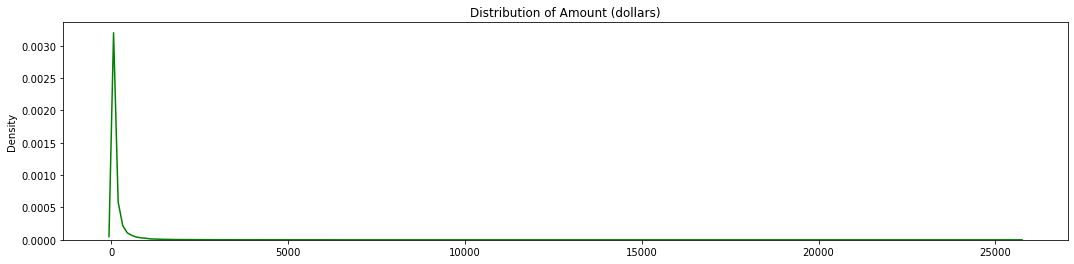

In [82]:
# visually inspecting amount
f, axes = plt.subplots(1, 1, figsize=(18,4))

amount_values = df['Amount'].values # values

sns.kdeplot(amount_values, color='g').set_title('Distribution of Amount (dollars)')
plt.show();

In [122]:
# calculating average of all transactions
pd.set_option('precision', 3)
print("Average Fraudulent Transaction Amount:  $ " + str('%.4f' % df[df['Class'] == 1]['Amount'].mean()))
print("Average Valid Transaction Amount:  $ " + str('%.4f' % df[df['Class'] == 0]['Amount'].mean()))
print("Average Transaction Amount:  $ " + str('%.4f' % df['Amount'].mean()))

Average Fraudulent Transaction Amount:  $ 122.2113
Average Valid Transaction Amount:  $ 88.2910
Average Transaction Amount:  $ 88.3496


The average fradulent transaction amount at 122.21 is higher than the average non-fradulent transaction amount of 88.29. This highlights the importantance of detecting fraud transactions. The presence of the fradulent transactions causes the average transaction amount to increase. 